In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
data = pd.read_csv('imdb_top_1000.csv')
df = pd.DataFrame(data)
df = df[0:10]

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    100 non-null    object 
 1   Series_Title   100 non-null    object 
 2   Released_Year  100 non-null    object 
 3   Certificate    96 non-null     object 
 4   Runtime        100 non-null    object 
 5   Genre          100 non-null    object 
 6   IMDB_Rating    100 non-null    float64
 7   Overview       100 non-null    object 
 8   Meta_score     84 non-null     float64
 9   Director       100 non-null    object 
 10  Star1          100 non-null    object 
 11  Star2          100 non-null    object 
 12  Star3          100 non-null    object 
 13  Star4          100 non-null    object 
 14  No_of_Votes    100 non-null    int64  
 15  Gross          85 non-null     object 
dtypes: float64(2), int64(1), object(13)
memory usage: 12.6+ KB


In [74]:
df.head()     

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [6]:
# Missing Values
print(df['Certificate'].unique())
print(df['Meta_score'].unique())
print(df['Gross'].unique())

['A' 'UA' 'U' 'PG-13' 'R' nan 'PG' 'G' 'Passed' 'TV-14' '16' 'TV-MA'
 'Unrated' 'GP' 'Approved' 'TV-PG' 'U/A']
[ 80. 100.  84.  90.  96.  94.  74.  66.  92.  82.  87.  73.  83.  nan
  79.  91.  61.  59.  65.  85.  98.  89.  88.  57.  67.  62.  77.  64.
  75.  97.  99.  78.  68.  81.  95.  76.  69.  55.  70.  58.  86.  71.
  63.  93.  72.  60.  47.  49.  50.  33.  54.  56.  51.  53.  48.  44.
  45.  40.  52.  28.  36.  46.  30.  41.]
['28,341,469' '134,966,411' '534,858,444' '57,300,000' '4,360,000'
 '377,845,905' '107,928,762' '96,898,818' '292,576,195' '37,030,102'
 '315,544,750' '330,252,182' '6,100,000' '342,551,365' '171,479,930'
 '46,836,394' '290,475,067' '112,000,000' nan '53,367,844' '188,020,017'
 '7,563,397' '10,055,859' '216,540,909' '136,801,374' '57,598,247'
 '100,125,643' '130,742,922' '322,740,140' '269,061' '335,451,311'
 '13,092,000' '13,182,281' '53,089,891' '132,384,315' '32,572,577'
 '187,705,427' '6,719,864' '23,341,568' '19,501,238' '422,783,777'
 '204,843,350' '1

In [84]:
mode = df['Certificate'].mode().values[0]
df['Certificate'].fillna(mode, inplace = True)

mean = df['Meta_score'].mean()
df['Meta_score'].fillna(mean, inplace = True)

#mean = df['Gross'].mean()
#df['Gross'].fillna(mean, inplace = True)

In [14]:
print(df.isnull().sum())

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [85]:
def convert_to_int(n_string):
    if isinstance(n_string, str):
        return int(n_string.replace(',', ''))

df['Gross int'] = df['Gross'].map(convert_to_int)

In [86]:
mean = df['Gross int'].mean()
df['Gross int'].fillna(mean, inplace = True)

In [33]:
print(df.isnull().sum())

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
Gross int          0
dtype: int64


<b>Rating Trends Over Years

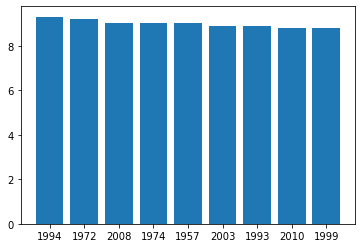

<Figure size 7200x36000 with 0 Axes>

In [87]:
#df_agrupado = df.groupby('Released_Year')['IMDB_Rating'].mean()
#print(df_agrupado)

plt.bar(df['Released_Year'], df['IMDB_Rating'])
plt.figure(figsize=(100, 500))
plt.show()

<b> Genre Popularity Analysis

In [43]:
# Generate a Seaborn bar plot to compare the number of movies across different genres.
df['Genre'].unique()

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Action, Adventure, Drama', 'Biography, Drama, History',
       'Action, Adventure, Sci-Fi', 'Drama, Romance', 'Western',
       'Action, Sci-Fi', 'Biography, Crime, Drama',
       'Action, Adventure, Fantasy', 'Comedy, Drama, Thriller',
       'Adventure, Drama, Sci-Fi', 'Animation, Adventure, Family',
       'Drama, War', 'Crime, Drama, Fantasy', 'Comedy, Drama, Romance',
       'Crime, Drama, Mystery', 'Crime, Drama, Thriller',
       'Action, Drama, Mystery', 'Drama, Family, Fantasy', 'Drama, Music',
       'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi',
       'Biography, Drama, Music', 'Crime, Mystery, Thriller',
       'Animation, Adventure, Drama', 'Animation, Drama, War',
       'Adventure, Comedy, Sci-Fi', 'Horror, Mystery, Thriller',
       'Drama, Romance, War', 'Comedy, Drama, Family',
       'Animation, Drama, Fantasy', 'Action, Biography, Drama',
       'Animation, Action, Adventure', 'Drama, Western',


In [59]:
sns.barplot(x='Genre', data=df)
#sns.countplot(x='Genre', data=df)
#plt.title('Anxiety Rate by Gender')
plt.show()

TypeError: Horizontal orientation requires numeric `x` variable.

<b>Director’s Impact on Ratings:

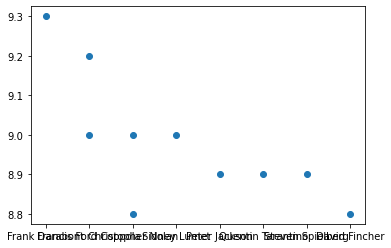

In [88]:
plt.scatter(df['Director'], df['IMDB_Rating'])
plt.show()

<b>Star Power Analysis

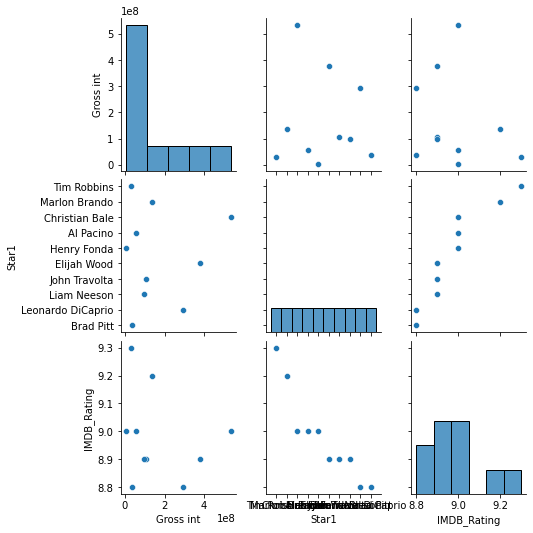

In [89]:
# Create a pair plot
sns.pairplot(df, vars=["Gross int", "Star1", "IMDB_Rating"])
plt.show()

<b>Box Plot of Genres vs. Ratings

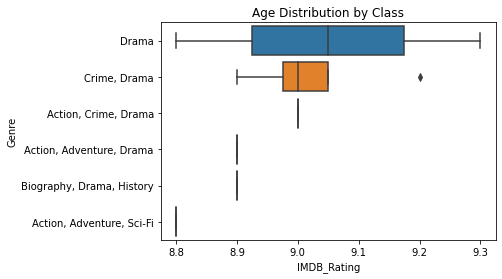

In [91]:
# Creating a box plot
sns.boxplot(x='IMDB_Rating', y='Genre', data=df)
plt.title('IMDB_Rating Distribution by Genre')
plt.show()

<b>Correlation Heatmap

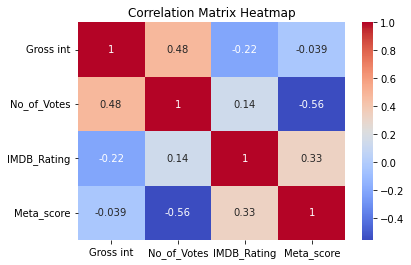

In [92]:
# Calculating the correlation matrix
df2 = df[['Gross int', 'No_of_Votes', 'IMDB_Rating', 'Meta_score']]
correlation_matrix = df2.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()